# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
alpaca_trade_api = os.getenv("alpaca_trade_api")

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
BTC = 1.2
ETH = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
my_btc = requests.get(btc_url).json()

# Fetch current ETH price
my_eth = requests.get(eth_url).json()

In [7]:
# Compute current value of my BTC crypto
my_btc = my_btc['data']['1']['quotes']['USD']['price']
my_btc

41020.0

In [8]:
# Compute current value of my ETH crypto
my_eth = my_eth['data']['1027']['quotes']['USD']['price']
my_eth

3077.19

In [9]:
# Print current crypto wallet balance
my_btc_value = BTC * my_btc
my_eth_value = ETH * my_eth
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 41020.0 BTC is $49224.00
The current value of your 3077.19 ETH is $16309.11


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret

alpaca_trade_api = os.getenv("alpaca_trade_api")
alpaca_secret_api = os.getenv("alpaca_secret_api")
#print(alpaca_trade_api)
#print(alpaca_secret_api)


# Create the Alpaca API object

alpaca = tradeapi.REST(alpaca_trade_api, alpaca_secret_api, api_version="v2")

In [12]:
# Format current date as ISO format

#today = pd.Timestamp("2022-04-11", tz="America/New_York").isoformat()
#bar_iter = api.get_bars_iter("AAPL", TimeFrame.Hour, "2021-06-08", "2021-06-08", adjustment='raw')
#today = api.get_bars_iter("AAPL", TimeFrame.Day, "2022-04-11", "2021-06-08", adjustment='raw')

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

alp_portfolio = alpaca.get_bars(tickers[0], TimeFrame.Day, start="2022-04-01", limit=1000).df
alp_portfolio_1 = alpaca.get_bars(tickers[1], TimeFrame.Day, start="2022-04-01", limit=1000).df

# Preview DataFrame
alp_portfolio

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-04-01 04:00:00+00:00,106.35,106.950,106.250,106.75,11579091,40126,106.667931
2022-04-04 04:00:00+00:00,106.87,106.870,106.560,106.84,9956493,32544,106.739298
2022-04-05 04:00:00+00:00,106.60,106.625,105.740,105.76,11018430,34684,105.931526
2022-04-06 04:00:00+00:00,105.20,105.805,105.115,105.49,13322630,47090,105.463015
2022-04-07 04:00:00+00:00,105.38,105.510,105.130,105.26,7921117,25631,105.278761
2022-04-08 04:00:00+00:00,104.82,105.010,104.615,104.73,6501822,24900,104.804999
2022-04-11 04:00:00+00:00,104.44,104.505,104.170,104.28,8377902,29767,104.312835
2022-04-12 04:00:00+00:00,104.83,104.920,104.580,104.61,8448652,29955,104.740856
2022-04-13 04:00:00+00:00,104.77,105.090,104.740,104.83,3793419,17321,104.928496


In [13]:
alp_portfolio.columns = pd.MultiIndex.from_product([[tickers[0]],alp_portfolio.columns])

In [14]:
alp_portfolio

AGG                                      \
                             open     high      low   close    volume   
timestamp                                                               
2022-04-01 04:00:00+00:00  106.35  106.950  106.250  106.75  11579091   
2022-04-04 04:00:00+00:00  106.87  106.870  106.560  106.84   9956493   
2022-04-05 04:00:00+00:00  106.60  106.625  105.740  105.76  11018430   
2022-04-06 04:00:00+00:00  105.20  105.805  105.115  105.49  13322630   
2022-04-07 04:00:00+00:00  105.38  105.510  105.130  105.26   7921117   
2022-04-08 04:00:00+00:00  104.82  105.010  104.615  104.73   6501822   
2022-04-11 04:00:00+00:00  104.44  104.505  104.170  104.28   8377902   
2022-04-12 04:00:00+00:00  104.83  104.920  104.580  104.61   8448652   
2022-04-13 04:00:00+00:00  104.77  105.090  104.740  104.83   3793419   

                                                   
                          trade_count        vwap  
timestamp                                          
2022-04-01 04:00:00+00:00       40126  106.667931  
2022-04-04 04:00:00+00:00       32544  106.739298  
2022-04-05 04:00:00+00:00       34684  105.931526  
2022-04-06 04:00:00+00:00       47090  105.463015  
2022-04-07 04:00:00+00:00       25631  105.278761  
2022-04-08 04:00:00+00:00       24900  104.804999  
2022-04-11 04:00:00+00:00       29767  104.312835  
2022-04-12 04:00:00+00:00       29955  104.740856  
2022-04-13 04:00:00+00:00       17321  104.928496

In [15]:
alp_portfolio_1.columns = pd.MultiIndex.from_product([[tickers[1]],alp_portfolio_1.columns])

In [16]:
alp_portfolio_1

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2022-04-01 04:00:00+00:00  453.30  453.46  449.1400  452.92   88676014   
2022-04-04 04:00:00+00:00  453.20  456.91  452.2600  456.80   59663209   
2022-04-05 04:00:00+00:00  455.23  457.83  449.8200  451.03   74022189   
2022-04-06 04:00:00+00:00  446.87  448.93  443.4700  446.52  105592595   
2022-04-07 04:00:00+00:00  445.67  450.69  443.5300  448.77   77538519   
2022-04-08 04:00:00+00:00  448.04  450.63  445.9400  447.57   79148376   
2022-04-11 04:00:00+00:00  444.11  445.00  439.3900  439.92   89825549   
2022-04-12 04:00:00+00:00  443.02  445.75  436.6501  438.29   84020734   
2022-04-13 04:00:00+00:00  437.96  442.84  437.8400  441.67   41607646   

                                                   
                          trade_count        vwap  
timestamp                                          
2022-04-01 04:00:00+00:00      624745  451.850848  
2022-04-04 04:00:00+00:00      503316  455.309774  
2022-04-05 04:00:00+00:00      644313  453.412462  
2022-04-06 04:00:00+00:00      901634  446.345270  
2022-04-07 04:00:00+00:00      628673  447.098209  
2022-04-08 04:00:00+00:00      573491  448.250805  
2022-04-11 04:00:00+00:00      779421  442.206374  
2022-04-12 04:00:00+00:00      694115  440.815476  
2022-04-13 04:00:00+00:00      376668  440.251364

In [17]:
new_dataframe = pd.concat([alp_portfolio,alp_portfolio_1],axis=1,names=tickers)
new_dataframe

AGG                                      \
                             open     high      low   close    volume   
timestamp                                                               
2022-04-01 04:00:00+00:00  106.35  106.950  106.250  106.75  11579091   
2022-04-04 04:00:00+00:00  106.87  106.870  106.560  106.84   9956493   
2022-04-05 04:00:00+00:00  106.60  106.625  105.740  105.76  11018430   
2022-04-06 04:00:00+00:00  105.20  105.805  105.115  105.49  13322630   
2022-04-07 04:00:00+00:00  105.38  105.510  105.130  105.26   7921117   
2022-04-08 04:00:00+00:00  104.82  105.010  104.615  104.73   6501822   
2022-04-11 04:00:00+00:00  104.44  104.505  104.170  104.28   8377902   
2022-04-12 04:00:00+00:00  104.83  104.920  104.580  104.61   8448652   
2022-04-13 04:00:00+00:00  104.77  105.090  104.740  104.83   3793419   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2022-04-01 04:00:00+00:00       40126  106.667931  453.30  453.46  449.1400   
2022-04-04 04:00:00+00:00       32544  106.739298  453.20  456.91  452.2600   
2022-04-05 04:00:00+00:00       34684  105.931526  455.23  457.83  449.8200   
2022-04-06 04:00:00+00:00       47090  105.463015  446.87  448.93  443.4700   
2022-04-07 04:00:00+00:00       25631  105.278761  445.67  450.69  443.5300   
2022-04-08 04:00:00+00:00       24900  104.804999  448.04  450.63  445.9400   
2022-04-11 04:00:00+00:00       29767  104.312835  444.11  445.00  439.3900   
2022-04-12 04:00:00+00:00       29955  104.740856  443.02  445.75  436.6501   
2022-04-13 04:00:00+00:00       17321  104.928496  437.96  442.84  437.8400   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-04-01 04:00:00+00:00  452.92   88676014      624745  451.850848  
2022-04-04 04:00:00+00:00  456.80   59663209      503316  455.309774  
2022-04-05 04:00:00+00:00  451.03   74022189      644313  453.412462  
2022-04-06 04:00:00+00:00  446.52  105592595      901634  446.345270  
2022-04-07 04:00:00+00:00  448.77   77538519      628673  447.098209  
2022-04-08 04:00:00+00:00  447.57   79148376      573491  448.250805  
2022-04-11 04:00:00+00:00  439.92   89825549      779421  442.206374  
2022-04-12 04:00:00+00:00  438.29   84020734      694115  440.815476  
2022-04-13 04:00:00+00:00  441.67   41607646      376668  440.251364

In [18]:
# Pick AGG and SPY close prices

agg_close_price = new_dataframe["AGG"]["close"][-1]
spy_close_price = new_dataframe["SPY"]["close"][-1]
# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.83
Current SPY closing price: $441.67


In [19]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22083.50
The current value of your 200 AGG shares is $20966.00


### Savings Health Analysis

In [20]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
savings = [my_btc_value + my_eth_value],[my_agg_value + my_spy_value]


# Create savings DataFrame

df_savings = pd.DataFrame(savings, index =['crypto','shares'], columns = ['Value'])

# Display savings DataFrame
display(df_savings)

,Value
crypto,65533.107
shares,43049.500


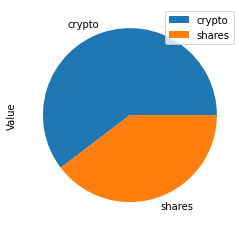

In [21]:
# Plot savings pie chart

df_savings.plot(kind="pie", subplots=True);

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = float(df_savings.sum())
difference = emergency_fund - total_savings

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in the fund")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
else:
    print(f"You need {difference} to reach your financial goal")

Congratulations! You have enough money in the fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [23]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
#new_dataframe = pd.concat([alp_portfolio,alp_portfolio_1],axis=1,names=tickers)
#alp_portfolio_1.columns = pd.MultiIndex.from_product([[tickers[1]],alp_portfolio_1.columns])


df_stock_data = alpaca.get_bars(tickers, timeframe, start="2021-01-01",limit=1000).df.dropna()
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
df_stock_data = pd.concat([AGG,SPY],axis=1,keys=tickers)
# Display sample data
df_stock_data.head()


AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2021-01-04 05:00:00+00:00  118.08  118.1400  117.9850  118.04   6414057   
2021-01-05 05:00:00+00:00  118.06  118.0600  117.7500  117.92   7477903   
2021-01-06 05:00:00+00:00  117.43  117.9000  117.1500  117.34  10687282   
2021-01-07 05:00:00+00:00  117.13  117.2600  117.0667  117.22   6639609   
2021-01-08 05:00:00+00:00  117.18  117.3428  116.9800  117.08   7935721   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2021-01-04 05:00:00+00:00       24932  118.076326  375.30  375.45  364.82   
2021-01-05 05:00:00+00:00       20178  117.859424  368.05  372.50  368.05   
2021-01-06 05:00:00+00:00       35832  117.308497  369.67  376.98  369.12   
2021-01-07 05:00:00+00:00       18535  117.211314  376.18  379.90  375.91   
2021-01-08 05:00:00+00:00       21350  117.077229  380.63  381.49  377.10   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2021-01-04 05:00:00+00:00  368.79  110311999      623066  369.335676  
2021-01-05 05:00:00+00:00  371.33   66435029      338927  370.390186  
2021-01-06 05:00:00+00:00  373.55  108007146      575347  373.807251  
2021-01-07 05:00:00+00:00  379.10   68801420      366626  378.249233  
2021-01-08 05:00:00+00:00  381.26   71677308      391944  380.111637

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

mc_sims = 500
weights = [0.4, 0.6]
num_yrs = 30
my_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights= weights,
    num_simulation = mc_sims,
    num_trading_days = 252*num_yrs)

In [26]:
# Printing the simulation input data

my_portfolio.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2021-01-04 05:00:00+00:00  118.08  118.1400  117.9850  118.04   6414057   
2021-01-05 05:00:00+00:00  118.06  118.0600  117.7500  117.92   7477903   
2021-01-06 05:00:00+00:00  117.43  117.9000  117.1500  117.34  10687282   
2021-01-07 05:00:00+00:00  117.13  117.2600  117.0667  117.22   6639609   
2021-01-08 05:00:00+00:00  117.18  117.3428  116.9800  117.08   7935721   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2021-01-04 05:00:00+00:00       24932  118.076326          NaN  375.30   
2021-01-05 05:00:00+00:00       20178  117.859424    -0.001017  368.05   
2021-01-06 05:00:00+00:00       35832  117.308497    -0.004919  369.67   
2021-01-07 05:00:00+00:00       18535  117.211314    -0.001023  376.18   
2021-01-08 05:00:00+00:00       21350  117.077229    -0.001194  380.63   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2021-01-04 05:00:00+00:00  375.45  364.82  368.79  110311999      623066   
2021-01-05 05:00:00+00:00  372.50  368.05  371.33   66435029      338927   
2021-01-06 05:00:00+00:00  376.98  369.12  373.55  108007146      575347   
2021-01-07 05:00:00+00:00  379.90  375.91  379.10   68801420      366626   
2021-01-08 05:00:00+00:00  381.49  377.10  381.26   71677308      391944   

                                                    
                                 vwap daily_return  
timestamp                                           
2021-01-04 05:00:00+00:00  369.335676          NaN  
2021-01-05 05:00:00+00:00  370.390186     0.006887  
2021-01-06 05:00:00+00:00  373.807251     0.005979  
2021-01-07 05:00:00+00:00  378.249233     0.014857  
2021-01-08 05:00:00+00:00  380.111637     0.005698

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

my_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001506,0.995919,0.993434,1.004156,1.005138,1.002532,0.993902,0.982626,0.997092,1.005427,...,1.003576,0.995459,0.999846,0.993465,1.003089,0.990179,1.009265,1.010354,0.997619,0.996721
2,1.007365,0.994576,0.996299,1.010528,1.004713,0.996980,0.996476,0.992706,1.006258,1.003085,...,1.000762,0.999080,1.010039,1.002373,1.008832,0.998267,1.005394,1.014032,0.992066,1.001439
3,1.009204,1.002102,1.002223,1.016195,1.002379,1.006654,0.996096,0.995614,1.001294,0.996932,...,0.992251,0.993814,1.009547,1.006372,1.006787,1.010467,0.998190,1.012852,0.995774,0.998833
4,1.013617,1.003638,0.994337,1.010350,0.996801,1.008547,1.002918,1.006952,0.999131,0.995405,...,1.002010,0.976759,1.007714,1.016116,1.019635,1.003539,1.007955,1.016795,1.008654,1.005366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.152207,11.962709,3.840183,15.871873,9.091706,5.634666,4.995828,4.962829,4.302633,4.092410,...,8.860709,15.941283,3.796166,4.692794,3.511298,4.611880,11.963047,3.255710,2.571006,3.322406
7557,7.068666,12.051066,3.859986,16.030707,9.202837,5.641574,5.039721,5.014340,4.350615,4.099961,...,8.879481,15.850198,3.813916,4.689977,3.523205,4.621899,11.877217,3.247499,2.607516,3.326643
7558,7.012262,12.101106,3.884987,16.035327,9.209559,5.655016,5.057418,5.030624,4.339077,4.119934,...,8.852458,15.857459,3.817658,4.648046,3.539204,4.634466,11.947805,3.261496,2.625873,3.347567
7559,6.958518,12.205212,3.874690,15.934421,9.249046,5.701395,5.070960,5.092493,4.327392,4.117526,...,8.825378,15.826587,3.781630,4.661484,3.531123,4.585573,12.016048,3.270807,2.635712,3.380653


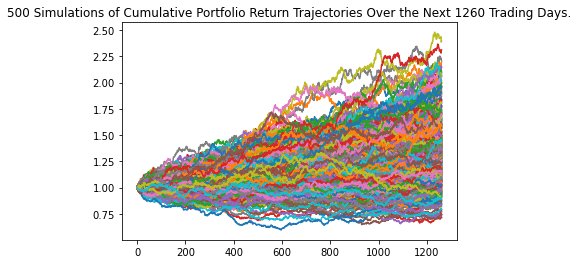

In [40]:
# Plot simulation outcomes
line_plot = my_portfolio.plot_simulation()

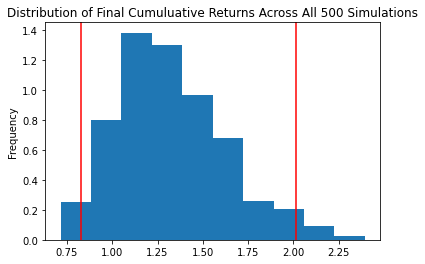

In [41]:
# Plot probability distribution and confidence intervals
dist_plot = my_portfolio.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement = my_portfolio.summarize_cumulative_return()

# Print summary statistics
print(retirement)

count           500.000000
mean              5.325799
std               2.951149
min               0.977711
25%               3.365590
50%               4.622573
75%               6.640120
max              19.131607
95% CI Lower      1.767144
95% CI Upper     13.245899
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [34]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(retirement[8]*initial_investment,2)
ci_upper = round(retirement[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $35342.88 and $264917.98


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [35]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(retirement[8]*initial_investment,2)
ci_upper = round(retirement[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $53014.32 and $397376.97


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

mc_sims = 500
weights = [0.4, 0.6]
num_yrs = 5
my_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights= weights,
    num_simulation = mc_sims,
    num_trading_days = 252*num_yrs)

In [37]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

my_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996250,1.000603,1.000939,0.992554,1.006678,1.001920,1.002272,1.008346,1.003151,1.007223,...,0.996112,0.995043,1.008982,1.004893,0.996489,1.004115,0.995709,0.999321,1.003220,0.995930
2,0.996169,1.001682,1.003893,0.988367,1.009607,1.005707,0.998063,1.006251,0.997913,1.004188,...,0.994415,0.995283,1.001751,1.001461,0.995132,1.006465,0.991961,1.003997,1.005898,0.993086
3,0.995147,0.999696,1.008554,0.995472,1.009437,0.992956,0.992993,1.009719,1.003916,0.992517,...,0.992810,0.994826,0.999708,0.995808,0.995777,1.005795,1.005064,1.016981,1.009156,0.987610
4,0.998372,0.996430,1.011533,0.987851,1.012054,0.995737,0.989199,1.009539,0.998501,0.999416,...,1.003001,0.996879,0.997926,0.995010,0.994786,1.001321,1.001092,1.027259,1.000415,0.987961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.932119,1.150645,1.327560,1.963779,1.902400,1.240409,1.133545,1.273462,1.781541,1.240918,...,1.017536,1.551483,0.922943,1.200228,0.838155,1.177156,1.162558,1.092407,0.915930,0.901127
1257,0.933482,1.151152,1.327250,1.970756,1.894244,1.250550,1.130214,1.271118,1.790691,1.243554,...,1.013618,1.554994,0.917775,1.192777,0.843544,1.168986,1.164795,1.100980,0.905079,0.896288
1258,0.932314,1.143504,1.316778,1.964758,1.903564,1.251412,1.121254,1.266664,1.783720,1.255772,...,1.016558,1.554179,0.917784,1.190022,0.838525,1.174062,1.162759,1.105107,0.901586,0.898278
1259,0.929261,1.146374,1.316175,1.958337,1.901752,1.244603,1.114775,1.276903,1.787635,1.257407,...,1.020768,1.546492,0.915770,1.177027,0.835902,1.177748,1.160711,1.105446,0.904328,0.901934


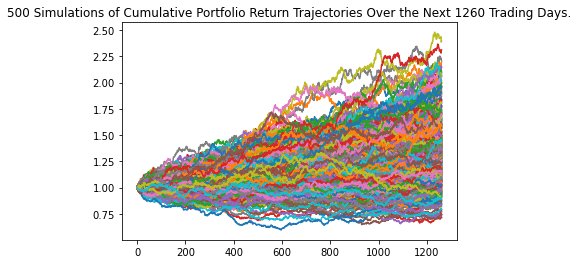

In [38]:
# Plot simulation outcomes
line_plot = my_portfolio.plot_simulation()

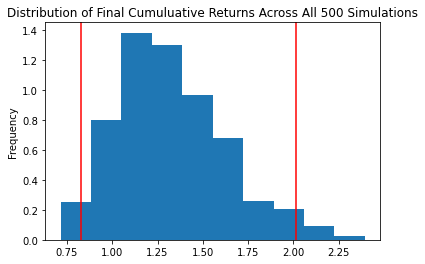

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = my_portfolio.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [44]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(retirement[8]*initial_investment,2)
ci_upper_five = round(retirement[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $106028.64 and $794753.94


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sims = 500
weights = [0.4, 0.6]
num_yrs = 10
my_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights= weights,
    num_simulation = mc_sims,
    num_trading_days = 252*num_yrs)

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
my_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995869,1.002880,0.995617,0.996781,1.004455,1.002385,1.002144,0.995590,0.998647,1.013716,...,0.999619,0.997413,1.003624,0.998062,0.998640,1.008681,1.005579,0.994441,1.001728,0.997094
2,0.985616,1.008253,0.999797,1.000183,0.997461,1.005849,0.995459,0.993283,1.005932,1.018402,...,0.997663,0.997015,1.007849,0.987861,0.995435,1.012850,1.001971,0.994671,1.008563,0.997142
3,0.990734,1.010437,0.998167,1.009647,0.995061,0.997422,1.005740,0.994025,1.005181,1.033700,...,0.988872,0.997059,1.005011,0.998858,0.991917,1.012656,1.012209,0.996872,0.997764,0.998649
4,0.984493,1.012102,0.996317,1.003348,0.982289,0.984457,0.999909,0.992296,1.010884,1.031961,...,0.984972,0.988861,1.003973,0.999834,0.998812,1.019347,1.008595,0.999422,1.010276,0.991393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.082537,1.576051,0.985226,1.007966,1.376367,1.179630,1.634892,1.007325,1.765992,2.082527,...,1.537466,1.827142,1.719705,1.841157,2.123017,1.548822,1.071184,1.473731,2.128733,1.484060
2517,1.086229,1.587395,0.991381,1.011976,1.385646,1.189062,1.660043,1.011353,1.786861,2.067954,...,1.539830,1.821627,1.716143,1.850765,2.117582,1.551933,1.065187,1.470857,2.115635,1.487893
2518,1.084006,1.601384,0.999631,1.019718,1.388045,1.185492,1.646364,1.019622,1.764518,2.094782,...,1.529589,1.798294,1.711584,1.850959,2.124329,1.557255,1.059647,1.472145,2.116580,1.487506
2519,1.095819,1.586519,1.001896,1.009701,1.378842,1.181489,1.650142,1.010469,1.781206,2.113488,...,1.537624,1.796130,1.728544,1.849183,2.150153,1.560809,1.054974,1.473246,2.101047,1.473224


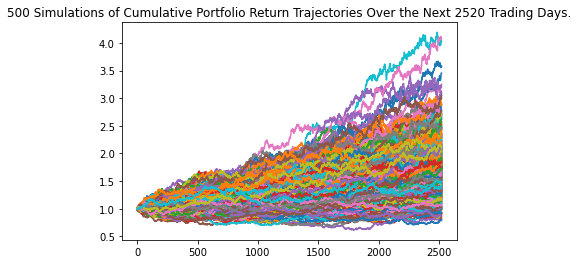

In [47]:
# Plot simulation outcomes
line_plot = my_portfolio.plot_simulation()

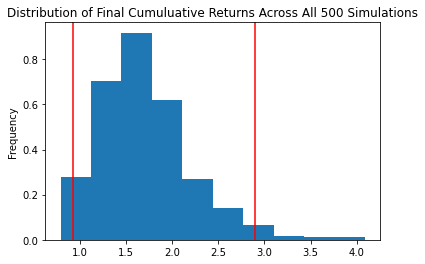

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = my_portfolio.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [50]:
# Set initial investment
inital_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(retirement[8]*initial_investment,2)
ci_upper_ten = round(retirement[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $106028.64 and $794753.94
